# Setup

In [1]:
# import your standard packages and parameters
%run ../pkgs.py
%run ../pars.py

# import your local functions
sys.path.insert(1, '../')
from local_functions import *
from MOM6_functions import *

# make sure the figures plot inline rather than at the end
%matplotlib inline

Default libraries loaded.


# Paths and Fns

In [2]:
inpath = '/tigress/GEOCLIM/LRGROUP/Liao/modelres/global_025/'
outpath = '../../data/'

outfn = '2d_var_global_processed.nc'


In [3]:
fns = sorted(glob.glob(inpath +'*dynamics2d_monthly*.nc')) # sorted() makes sure the files are sorted in time
ds_in = xr.open_dataset(fns[0])
# ds_in

# Get Data

In [4]:
fns = sorted(glob.glob(inpath +'*dynamics2d_monthly*.nc')) # sorted() makes sure the files are sorted in time

# merge all ssh into one file
cnt = 0;
for ff, fn in enumerate(fns[:-1]):
    ds_in = xr.open_dataset(fn)
    
    print('processing: ', fn[-7:-3])
    
    if ff == 0:
        # intialize
        SSH = ds_in.SSH
        SST = ds_in.SST
        SSS = ds_in.SSS
        SSU = ds_in.SSU
        SSV = ds_in.SSV
        taux = ds_in.taux
        tauy = ds_in.tauy
        SW = ds_in.SW
        LW = ds_in.LW
        latent = ds_in.latent
        sensible = ds_in.sensible
        MLD_003 = ds_in.MLD_003
        MLD_0125 = ds_in.MLD_0125
#         evap = ds_in.evap
#         precip = ds_in.precip
        PRCmE = ds_in.PRCmE
        ePBL_h_ML = ds_in.ePBL_h_ML
        hfrunoffds = ds_in.hfrunoffds
        net_heat_coupler  = ds_in.net_heat_coupler 
        net_heat_surface = ds_in.net_heat_surface
        salt_flux = ds_in.salt_flux
        salt_flux_added = ds_in.salt_flux_added
#         net_fresh_water_global_adjustment = ds_in.net_fresh_water_global_adjustment
        lrunoff  = ds_in.lrunoff 
        
        lat = np.array(ds_in.geolat)
        lon = np.array(ds_in.geolon)
        lat_u = np.array(ds_in.geolat_u)
        lon_u = np.array(ds_in.geolon_u)
        lat_v = np.array(ds_in.geolat_v)
        lon_v = np.array(ds_in.geolon_v)
    else:
        # add on current time step along time dimension
        SSH = xr.concat((SSH,ds_in.SSH),dim = 'time')
        SST = xr.concat((SST,ds_in.SST),dim = 'time')
        SSS = xr.concat((SSS,ds_in.SSS),dim = 'time')
        SSU = xr.concat((SSU,ds_in.SSU),dim = 'time')
        SSV = xr.concat((SSV,ds_in.SSV),dim = 'time')
        taux = xr.concat((taux,ds_in.taux),dim = 'time')
        tauy = xr.concat((tauy,ds_in.tauy),dim = 'time')
        SW = xr.concat((SW,ds_in.SW),dim = 'time')
        LW = xr.concat((LW,ds_in.LW),dim = 'time')
        latent = xr.concat((latent,ds_in.latent),dim = 'time')
        sensible = xr.concat((sensible,ds_in.sensible),dim = 'time')
        MLD_003 = xr.concat((MLD_003,ds_in.MLD_003),dim = 'time')
        MLD_0125 = xr.concat((MLD_0125,ds_in.MLD_0125),dim = 'time')
#         evap = xr.concat((evap,ds_in.evap),dim = 'time')
#         precip = xr.concat((precip,ds_in.precip),dim = 'time')
        PRCmE = xr.concat((PRCmE,ds_in.PRCmE),dim = 'time')
        ePBL_h_ML = xr.concat((ePBL_h_ML,ds_in.ePBL_h_ML),dim = 'time')
        hfrunoffds = xr.concat((hfrunoffds,ds_in.hfrunoffds),dim = 'time')
        net_heat_coupler  = xr.concat((net_heat_coupler,ds_in.net_heat_coupler),dim = 'time') 
        net_heat_surface = xr.concat((net_heat_surface,ds_in.net_heat_surface),dim = 'time')
        salt_flux = xr.concat((salt_flux,ds_in.salt_flux),dim = 'time')
        salt_flux_added = xr.concat((salt_flux_added,ds_in.salt_flux_added),dim = 'time')
#         net_fresh_water_global_adjustment = xr.concat((net_fresh_water_global_adjustment,ds_in.net_fresh_water_global_adjustment),dim = 'time')
        lrunoff  = xr.concat((lrunoff,ds_in.lrunoff ),dim = 'time')
    
    cnt = cnt + ds_in.time.shape[0]

t = SSH.time
    
print('ssh final shape',SSH.shape)

processing:  2003
processing:  2004
processing:  2005
processing:  2006
processing:  2007
processing:  2008
processing:  2009
processing:  2010
processing:  2011
processing:  2012
processing:  2013
processing:  2014
processing:  2015
processing:  2016
processing:  2017
ssh final shape (180, 1080, 1440)


# Shift Lon 

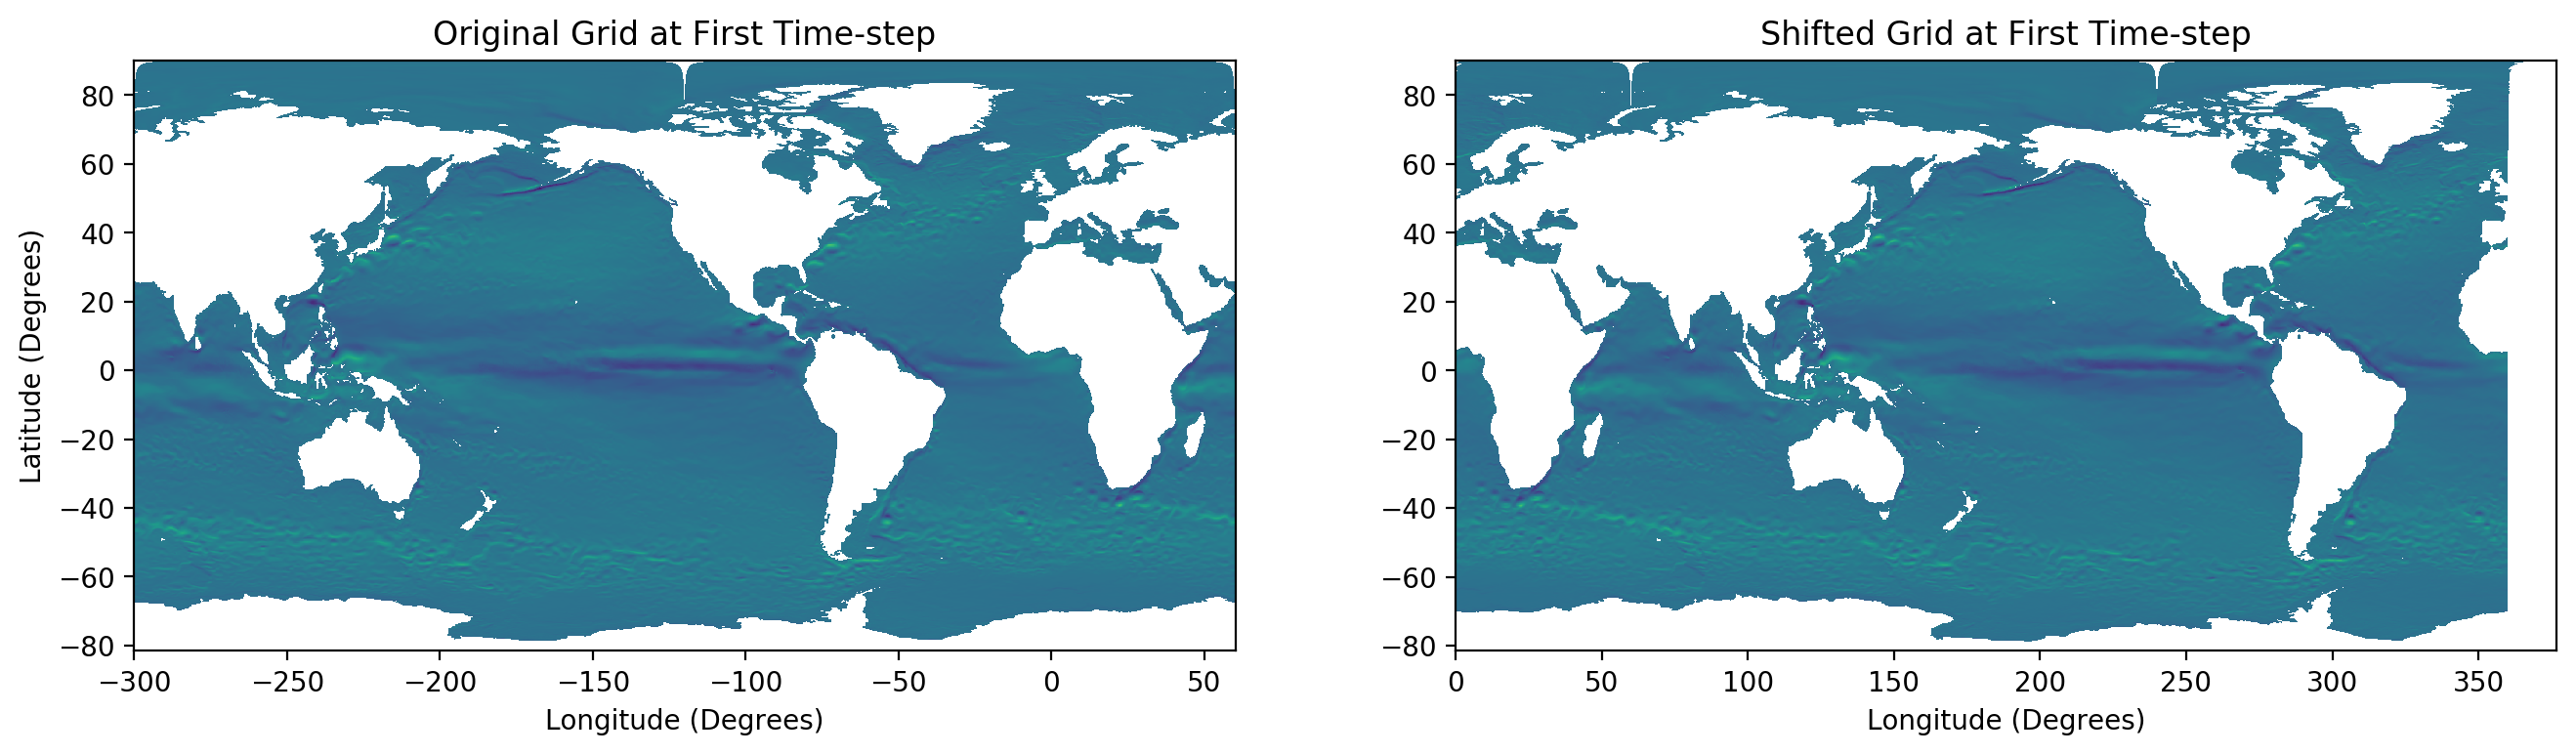

In [6]:
SST = shiftlon_glob_MOM6_0_360(lat,lon,SST, grid = False) 
SSS = shiftlon_glob_MOM6_0_360(lat,lon,SSS, grid = False) 
SSU = shiftlon_glob_MOM6_0_360(lat_u,lon_u,SSU, type = 'u',grid = False,plot = True) 
SSV = shiftlon_glob_MOM6_0_360(lat_v,lon_v,SSV, type = 'v', grid = False)
lat_u,lon_u,taux = shiftlon_glob_MOM6_0_360(lat_u,lon_u,taux, type = 'u') 
lat_v,lon_v,tauy = shiftlon_glob_MOM6_0_360(lat_v,lon_v,tauy, type = 'v') 
SW = shiftlon_glob_MOM6_0_360(lat,lon,SW, grid = False) 
LW = shiftlon_glob_MOM6_0_360(lat,lon,LW, grid = False) 
latent = shiftlon_glob_MOM6_0_360(lat,lon,latent, grid = False) 
sensible = shiftlon_glob_MOM6_0_360(lat,lon,sensible, grid = False) 
MLD_003 = shiftlon_glob_MOM6_0_360(lat,lon,MLD_003, grid = False) 
MLD_0125 = shiftlon_glob_MOM6_0_360(lat,lon,MLD_0125, grid = False) 
# evap = shiftlon_glob_MOM6_0_360(lat,lon,evap, grid = False) 
# precip = shiftlon_glob_MOM6_0_360(lat,lon,precip, grid = False) 
PRCmE = shiftlon_glob_MOM6_0_360(lat,lon,PRCmE, grid = False) 
ePBL_h_ML = shiftlon_glob_MOM6_0_360(lat,lon,ePBL_h_ML, grid = False) 
hfrunoffds = shiftlon_glob_MOM6_0_360(lat,lon,hfrunoffds, grid = False) 
net_heat_coupler = shiftlon_glob_MOM6_0_360(lat,lon,net_heat_coupler, grid = False) 
net_heat_surface = shiftlon_glob_MOM6_0_360(lat,lon,net_heat_surface, grid = False) 
salt_flux = shiftlon_glob_MOM6_0_360(lat,lon,salt_flux, grid = False) 
salt_flux_added = shiftlon_glob_MOM6_0_360(lat,lon,salt_flux_added, grid = False) 
lrunoff = shiftlon_glob_MOM6_0_360(lat,lon,lrunoff, grid = False) 

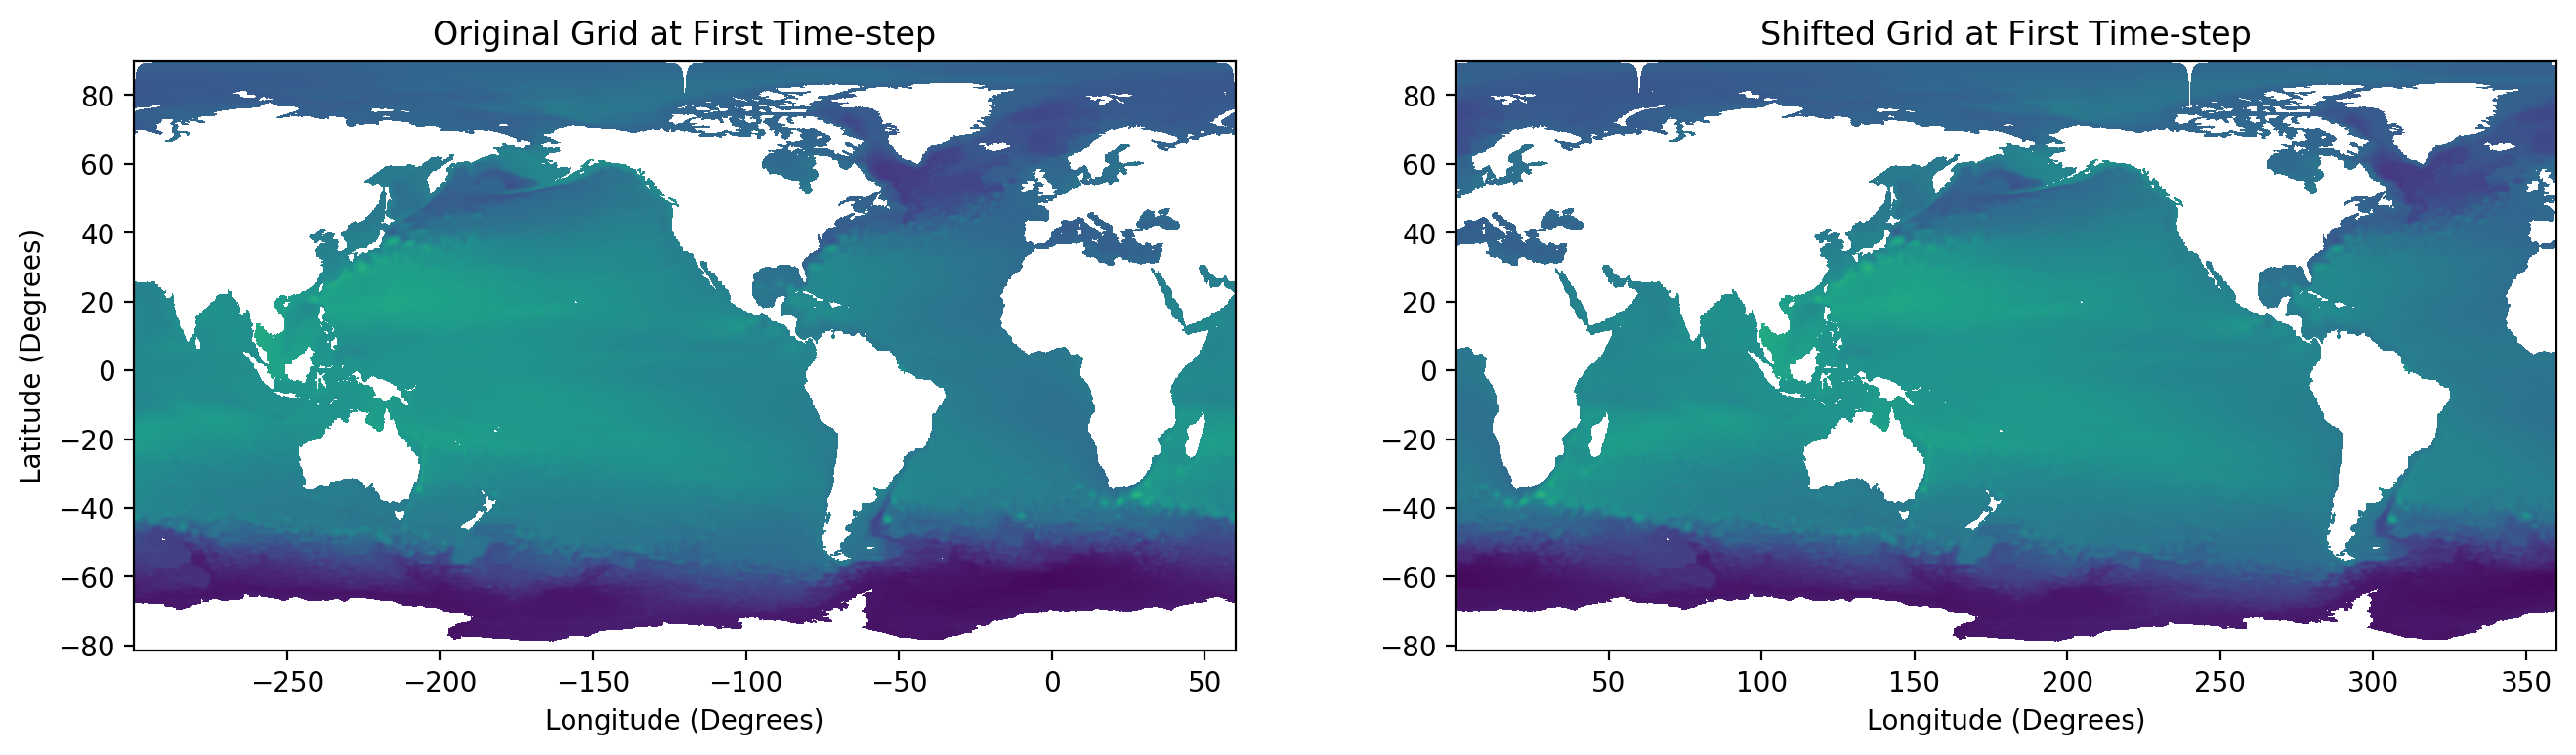

In [7]:
lat,lon,SSH = shiftlon_glob_MOM6_0_360(lat,lon,SSH, plot = True) 

# Subset Spatially for Indian Ocean

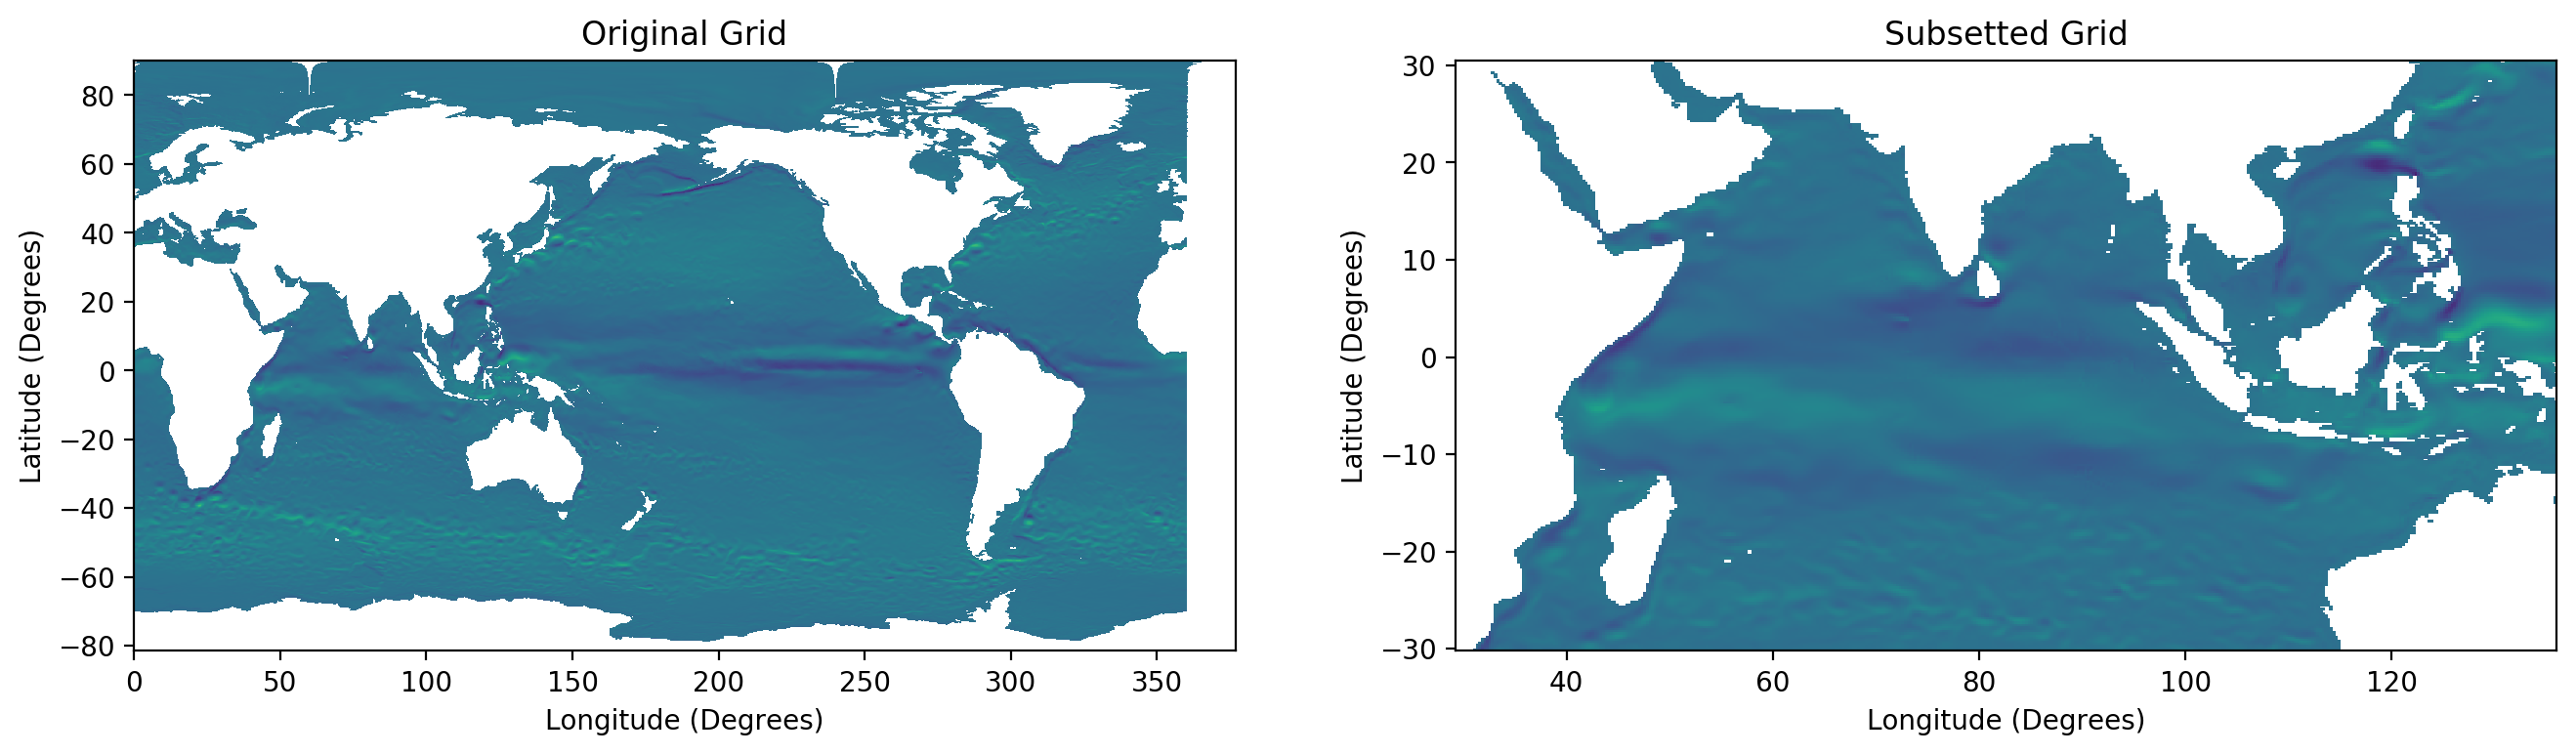

In [8]:
SST = subset_global_MOM6_Indian_Ocean(lat,lon,SST, grid = False)
SSS = subset_global_MOM6_Indian_Ocean(lat,lon,SSS, grid = False)
SSU = subset_global_MOM6_Indian_Ocean(lat_u,lon_u,SSU, type = 'u', grid = False,plot = True)
SSV = subset_global_MOM6_Indian_Ocean(lat_v,lon_v,SSV, type = 'v', grid = False)
lat_u,lon_u,taux = subset_global_MOM6_Indian_Ocean(lat_u,lon_u,taux, type = 'u')
lat_v,lon_v,tauy = subset_global_MOM6_Indian_Ocean(lat_v,lon_v,tauy, type = 'v')
SW = subset_global_MOM6_Indian_Ocean(lat,lon,SW, grid = False)
LW = subset_global_MOM6_Indian_Ocean(lat,lon,LW, grid = False)
latent = subset_global_MOM6_Indian_Ocean(lat,lon,latent, grid = False)
sensible = subset_global_MOM6_Indian_Ocean(lat,lon,sensible, grid = False)
MLD_003 = subset_global_MOM6_Indian_Ocean(lat,lon,MLD_003, grid = False)
MLD_0125 = subset_global_MOM6_Indian_Ocean(lat,lon,MLD_0125, grid = False)
# evap = subset_global_MOM6_Indian_Ocean(lat,lon,evap, grid = False)
# precip = subset_global_MOM6_Indian_Ocean(lat,lon,precip, grid = False)
PRCmE = subset_global_MOM6_Indian_Ocean(lat,lon,PRCmE, grid = False)
ePBL_h_ML = subset_global_MOM6_Indian_Ocean(lat,lon,ePBL_h_ML, grid = False)
hfrunoffds = subset_global_MOM6_Indian_Ocean(lat,lon,hfrunoffds, grid = False)
net_heat_coupler = subset_global_MOM6_Indian_Ocean(lat,lon,net_heat_coupler, grid = False)
net_heat_surface = subset_global_MOM6_Indian_Ocean(lat,lon,net_heat_surface, grid = False)
salt_flux = subset_global_MOM6_Indian_Ocean(lat,lon,salt_flux, grid = False)
salt_flux_added = subset_global_MOM6_Indian_Ocean(lat,lon,salt_flux_added, grid = False)
lrunoff = subset_global_MOM6_Indian_Ocean(lat,lon,lrunoff, grid = False)

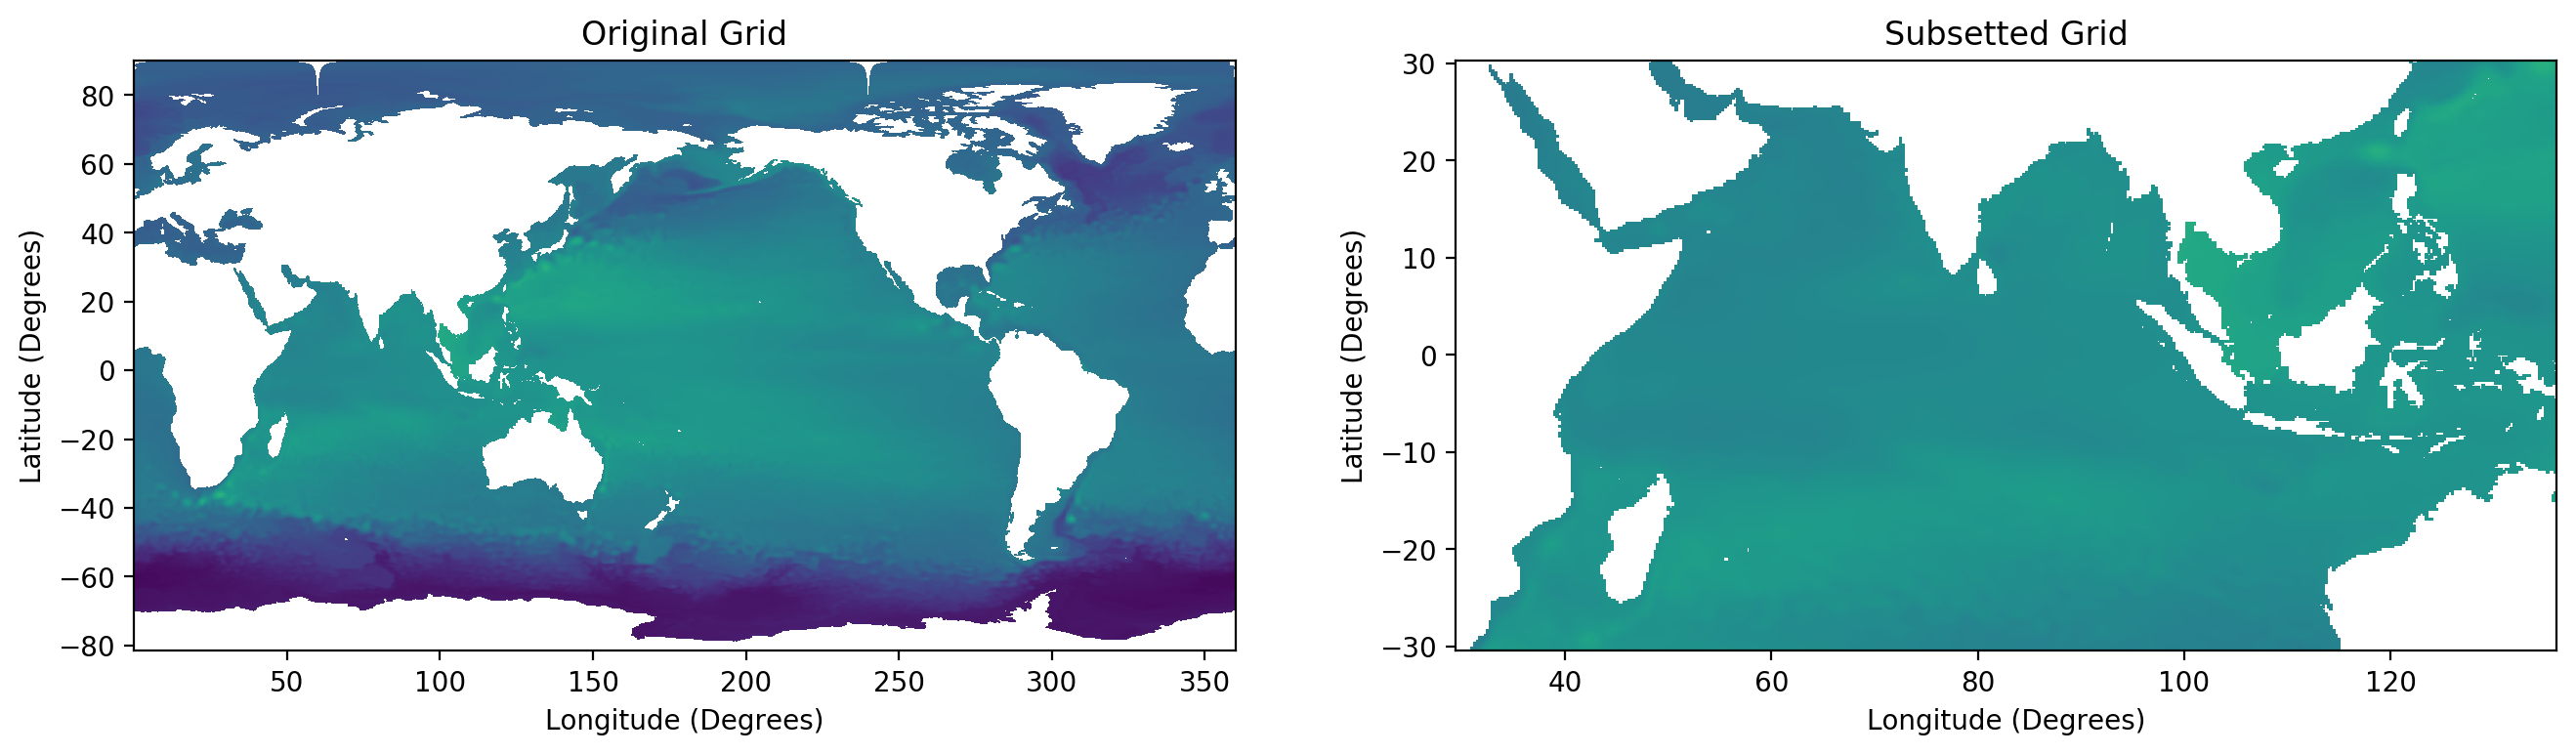

In [9]:
lat,lon,SSH = subset_global_MOM6_Indian_Ocean(lat,lon,SSH, plot = True)

In [13]:
# convert to xarray dataset
ds_out = xr.Dataset(coords={'time': t,
                       'lat': lat[:,0],
                       'lon': lon[0,:]})

dims = ['time','lat', 'lon']
coords = [t,lat[:,0],lon[0,:]]

dims_u = ['time','lat_u', 'lon_u']
coords_u = [t,lat_u[:,0],lon_u[0,:]]

dims_v = ['time','lat_v', 'lon_v']
coords_v = [t,lat_v[:,0],lon_v[0,:]]

# add variables to dataset
ds_out['SSH']=xr.DataArray(np.array(SSH),dims = dims,coords =coords)
ds_out['SST']=xr.DataArray(np.array(SST),dims = dims,coords =coords)
ds_out['SSS']=xr.DataArray(np.array(SSS),dims = dims,coords =coords)
ds_out['SSU']=xr.DataArray(np.array(SSU),dims = dims_u,coords =coords_u)
ds_out['SSV']=xr.DataArray(np.array(SSV),dims = dims_v,coords =coords_v)
ds_out['taux']=xr.DataArray(np.array(taux),dims = dims_u,coords =coords_u)
ds_out['tauy']=xr.DataArray(np.array(tauy),dims = dims_v,coords =coords_v)
ds_out['SW']=xr.DataArray(np.array(SW),dims = dims,coords =coords)
ds_out['LW']=xr.DataArray(np.array(LW),dims = dims,coords =coords)
ds_out['latent']=xr.DataArray(np.array(latent),dims = dims,coords =coords)
ds_out['sensible']=xr.DataArray(np.array(sensible),dims = dims,coords =coords)
ds_out['MLD_003']=xr.DataArray(np.array(MLD_003),dims = dims,coords =coords)
ds_out['MLD_0125']=xr.DataArray(np.array(MLD_0125),dims = dims,coords =coords)
# ds_out['evap']=xr.DataArray(np.array(evap),dims = dims,coords =coords)
# ds_out['precip']=xr.DataArray(np.array(precip),dims = dims,coords =coords)
ds_out['PRCmE']=xr.DataArray(np.array(PRCmE),dims = dims,coords =coords)
ds_out['ePBL_h_ML']=xr.DataArray(np.array(ePBL_h_ML),dims = dims,coords =coords)
ds_out['hfrunoffds']=xr.DataArray(np.array(hfrunoffds),dims = dims,coords =coords)
ds_out['net_heat_coupler']=xr.DataArray(np.array(net_heat_coupler),dims = dims,coords =coords)
ds_out['net_heat_surface']=xr.DataArray(np.array(net_heat_surface),dims = dims,coords =coords)
ds_out['salt_flux']=xr.DataArray(np.array(salt_flux),dims = dims,coords =coords)
ds_out['salt_flux_added']=xr.DataArray(np.array(salt_flux_added),dims = dims,coords =coords)
# ds_out['net_fresh_water_global_adjustment']=xr.DataArray(np.array(net_fresh_water_global_adjustment),dims = ['time','scalar_axis'],coords =[t,[0]])
ds_out['lrunoff']=xr.DataArray(np.array(lrunoff),dims = dims,coords =coords)

# convert to datetime format
datetimeindex = ds_out.indexes['time'].to_datetimeindex()
ds_out['time'] = datetimeindex
ds_out


/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.


<xarray.Dataset>
Dimensions:           (lat: 256, lat_u: 256, lat_v: 257, lon: 428, lon_u: 429, lon_v: 428, time: 180)
Coordinates:
  * time              (time) datetime64[ns] 2003-01-16T12:00:00 ... 2017-12-16T12:00:00
  * lat               (lat) float32 -30.455408 -30.239664 ... 30.239664
  * lon               (lon) float32 29.375 29.625 29.875 ... 135.875 136.125
  * lat_u             (lat_u) float32 -30.239664 -30.023445 ... 30.455408
  * lon_u             (lon_u) float32 29.25 29.5 29.75 ... 135.5 135.75 136.0
  * lat_v             (lat_v) float32 -30.563103 -30.347595 ... 30.347595
  * lon_v             (lon_v) float32 29.375 29.625 29.875 ... 135.875 136.125
Data variables:
    SSH               (time, lat, lon) float32 nan nan ... 0.7946682 0.7631455
    SST               (time, lat, lon) float32 nan nan ... 22.170177 22.254576
    SSS               (time, lat, lon) float32 nan nan ... 34.75015 34.752895
    SSU               (time, lat_u, lon_u) float32 nan nan ... -0.02071416

# Subset temporally for Indian Ocean Model Run 2009-2017

In [14]:
time_slice = slice('2009-01-01', '2018-01-01')
ds_out = ds_out.sel(time = time_slice)
ds_out

<xarray.Dataset>
Dimensions:           (lat: 256, lat_u: 256, lat_v: 257, lon: 428, lon_u: 429, lon_v: 428, time: 108)
Coordinates:
  * time              (time) datetime64[ns] 2009-01-16T12:00:00 ... 2017-12-16T12:00:00
  * lat               (lat) float32 -30.455408 -30.239664 ... 30.239664
  * lon               (lon) float32 29.375 29.625 29.875 ... 135.875 136.125
  * lat_u             (lat_u) float32 -30.239664 -30.023445 ... 30.455408
  * lon_u             (lon_u) float32 29.25 29.5 29.75 ... 135.5 135.75 136.0
  * lat_v             (lat_v) float32 -30.563103 -30.347595 ... 30.347595
  * lon_v             (lon_v) float32 29.375 29.625 29.875 ... 135.875 136.125
Data variables:
    SSH               (time, lat, lon) float32 nan nan ... 0.7946682 0.7631455
    SST               (time, lat, lon) float32 nan nan ... 22.170177 22.254576
    SSS               (time, lat, lon) float32 nan nan ... 34.75015 34.752895
    SSU               (time, lat_u, lon_u) float32 nan nan ... -0.02071416

# Save

In [15]:
# delete if already present
if os.path.isfile(outfn):
    os.remove(outfn)

ds_out.to_netcdf(outpath + outfn,mode='w',format = "NETCDF4")

ds_out

<xarray.Dataset>
Dimensions:           (lat: 256, lat_u: 256, lat_v: 257, lon: 428, lon_u: 429, lon_v: 428, time: 108)
Coordinates:
  * time              (time) datetime64[ns] 2009-01-16T12:00:00 ... 2017-12-16T12:00:00
  * lat               (lat) float32 -30.455408 -30.239664 ... 30.239664
  * lon               (lon) float32 29.375 29.625 29.875 ... 135.875 136.125
  * lat_u             (lat_u) float32 -30.239664 -30.023445 ... 30.455408
  * lon_u             (lon_u) float32 29.25 29.5 29.75 ... 135.5 135.75 136.0
  * lat_v             (lat_v) float32 -30.563103 -30.347595 ... 30.347595
  * lon_v             (lon_v) float32 29.375 29.625 29.875 ... 135.875 136.125
Data variables:
    SSH               (time, lat, lon) float32 nan nan ... 0.7946682 0.7631455
    SST               (time, lat, lon) float32 nan nan ... 22.170177 22.254576
    SSS               (time, lat, lon) float32 nan nan ... 34.75015 34.752895
    SSU               (time, lat_u, lon_u) float32 nan nan ... -0.02071416